In [32]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import os.path as osp
import hvplot.pandas
from utils.basics import RESOURCES_DINFO_DIR, get_sbj_scan_list

In [9]:
motion_path = osp.join(RESOURCES_DINFO_DIR,'motion_confounds.csv')

In [18]:
motion_df = pd.read_csv(motion_path, index_col=['Subject','Run'])
motion_df = motion_df.infer_objects()

In [19]:
sbj_list, scan_list, snycq = get_sbj_scan_list(when='post_motion')
snycq = snycq.infer_objects()

++ [post_motion] Number of subjects: 133 subjects
++ [post_motion] Number of scans:    471 scans


In [43]:
assert snycq.index.equals(motion_df.index),'Indexes do not match'

In [44]:
df = pd.DataFrame(index=snycq.columns, columns=['R','p_val'])
for target in snycq.columns:
    r,p = pearsonr(motion_df.values.flatten(),snycq[target].values)
    df.loc[target,'R'] = r
    df.loc[target,'p_val'] = p

In [45]:
df

,R,p_val
Positive,-0.00952,0.836739
Negative,0.046817,0.310627
Future,0.000184,0.996826
Past,-0.134186,0.003527
Myself,-0.019284,0.676359
People,0.002491,0.957
Surroundings,-0.004384,0.924397
Vigilance,0.044844,0.331481
Images,-0.013214,0.774852
Words,0.01591,0.730551


In [48]:
a = pd.concat([motion_df,snycq],axis=1)

In [59]:
a.hvplot.scatter(x='Mean Rel Motion', y='Past', aspect='square')

:Scatter   [Mean Rel Motion]   (Past)

In [65]:
import seaborn as sns

<AxesSubplot:xlabel='Mean Rel Motion', ylabel='Vigilance'>

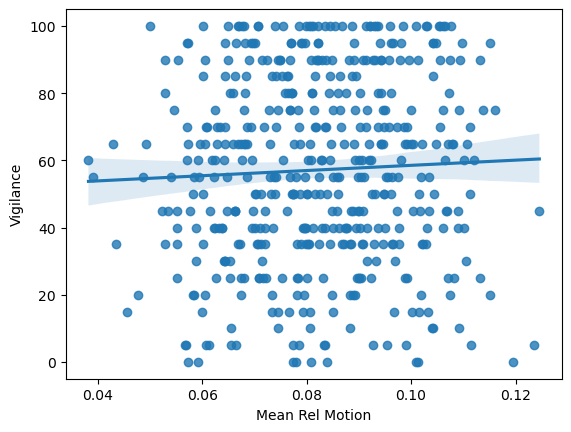

In [68]:
sns.regplot(x=motion_df,y=snycq['Vigilance'])

<AxesSubplot:xlabel='Mean Rel Motion', ylabel='Past'>

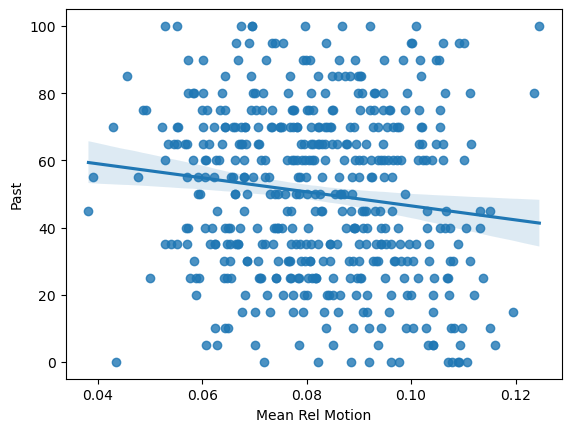

In [69]:
sns.regplot(x=motion_df,y=snycq['Past'])